<a href="https://colab.research.google.com/github/nstafford/glucose/blob/main/DEXCOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Combining DEXCOM and OURA Ring data

In [95]:
import numpy as np  # library of array function
import pandas as pd  # library for what are called "dataframes"

In [96]:
# get permission for google colab to access google drive and mount the drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [105]:
path_to_file = "/gdrive/MyDrive/Clarity_Export_2023-10-09_203747.csv"

# note to self: tricky csv file format, need to use row 0 as headers, skip rows 1-21, and then use even rows from 22 on

# read csv file
df = pd.read_csv(path_to_file, sep='\t', skiprows=lambda x: x in range(1,22) or x%2, usecols = [1,7,12,13])  # lambda returns True to skip a row

# rename the long time column name
df.rename(columns={df.columns[0]:'Time'}, inplace=True)

# rename glucose
df.rename(columns={df.columns[1]:'Glucose'}, inplace=True)

# convert format of time from string to datetime object
df['Time']= pd.to_datetime(df['Time'])

# set the index to the Time column (for time series data this is better)
df = df.set_index('Time')

## Plot the glucose vs time

<Axes: xlabel='Time'>

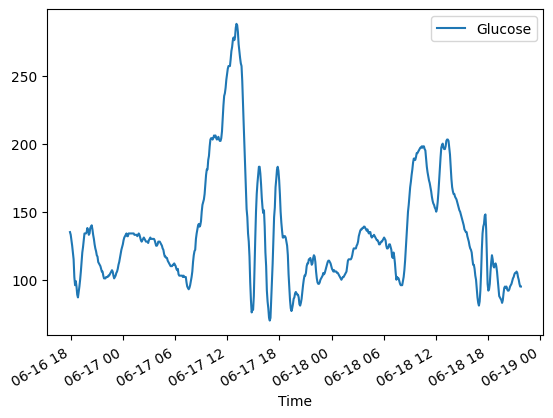

In [107]:
df.iloc[:,0:1].plot()

## Plot glucose vs time grouped by day

In [108]:
# grouping by day is tricky
d1 = df.copy()
d1.index = [d1.index.time, d1.index.date]
d1 = d1.Glucose.unstack().interpolate()

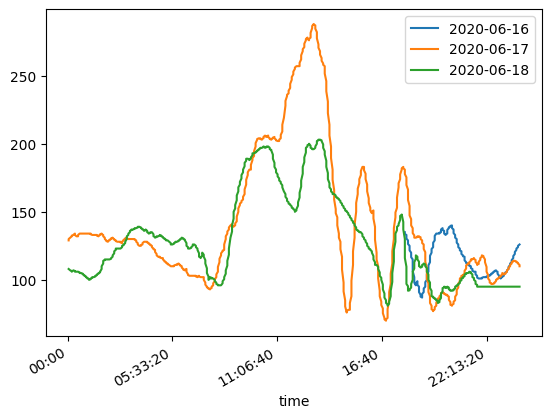

In [111]:
ax = d1.plot()
ax.figure.autofmt_xdate()